Задание: Построение модели для предсказания выживаемости пассажиров Титаника
Описание задания
Задача классификации основана на данных пассажиров Титаника, которые вы сможете загрузить с платформы Kaggle. Целью задания является построение модели машинного обучения, способной предсказать, выжил пассажир или нет на основании предоставленных характеристик.

Датасет: Titanic - Machine Learning from Disaster
Ссылка на датасет

Целевая переменная:
Целевой переменной для предсказания является колонка Survived:

1 — пассажир выжил;
0 — пассажир не выжил.
Признаки для анализа: В датасете содержится множество признаков, которые могут быть использованы для построения модели. Основные признаки включают:

Pclass: Класс обслуживания (1, 2 или 3)
Sex: Пол пассажира
Age: Возраст пассажира
SibSp: Количество родственников (братьев, сестер, супругов) на борту
Parch: Количество родителей/детей на борту
Ticket: Номер билета
Fare: Стоимость билета
Cabin: Номер каюты (если известен)
Embarked: Порт посадки (C — Cherbourg; Q — Queenstown; S — Southampton)

In [8]:
# скачивание данных
!kaggle competitions download -c titanic

100%|███████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 336kB/s]
100%|███████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 335kB/s]


In [9]:
!ls

Titanic.ipynb  titanic.zip


In [10]:
# распаковка
!unzip titanic.zip
!rm titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [11]:
!ls

gender_submission.csv  test.csv  Titanic.ipynb	train.csv


In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [13]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#смотрим сколько выжило
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
#в процентном соотношении
round(train_data['Survived'].value_counts()/len(train_data)*100,2)

Survived
0    61.62
1    38.38
Name: count, dtype: float64

In [18]:
print('самому взрослому было', train_data['Age'].max(),'лет') 
print('самый дорогой билет был стоимостью', round(train_data['Fare'].max(),2), ',когда средняя стоимость билета',round(train_data['Fare'].mean(),2))

самому взрослому было 80.0 лет
самый дорогой билет был стоимостью 512.33 ,когда средняя стоимость билета 32.2


In [19]:
# проверка пустых значении в столбце
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
#просмотр пустых записей
train_data[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

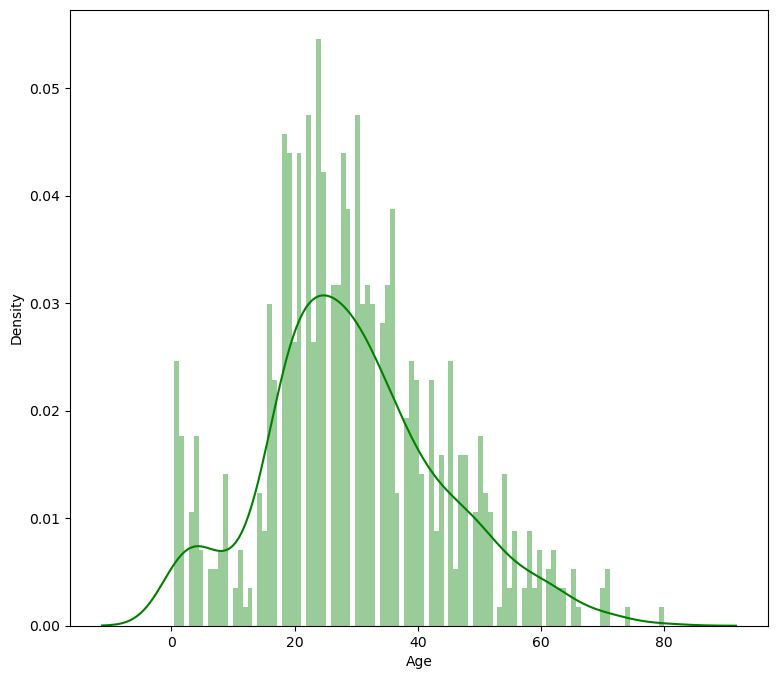

In [23]:

plt.figure(figsize=(9, 8))
sns.distplot(train_data['Age'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [24]:
features = ['Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

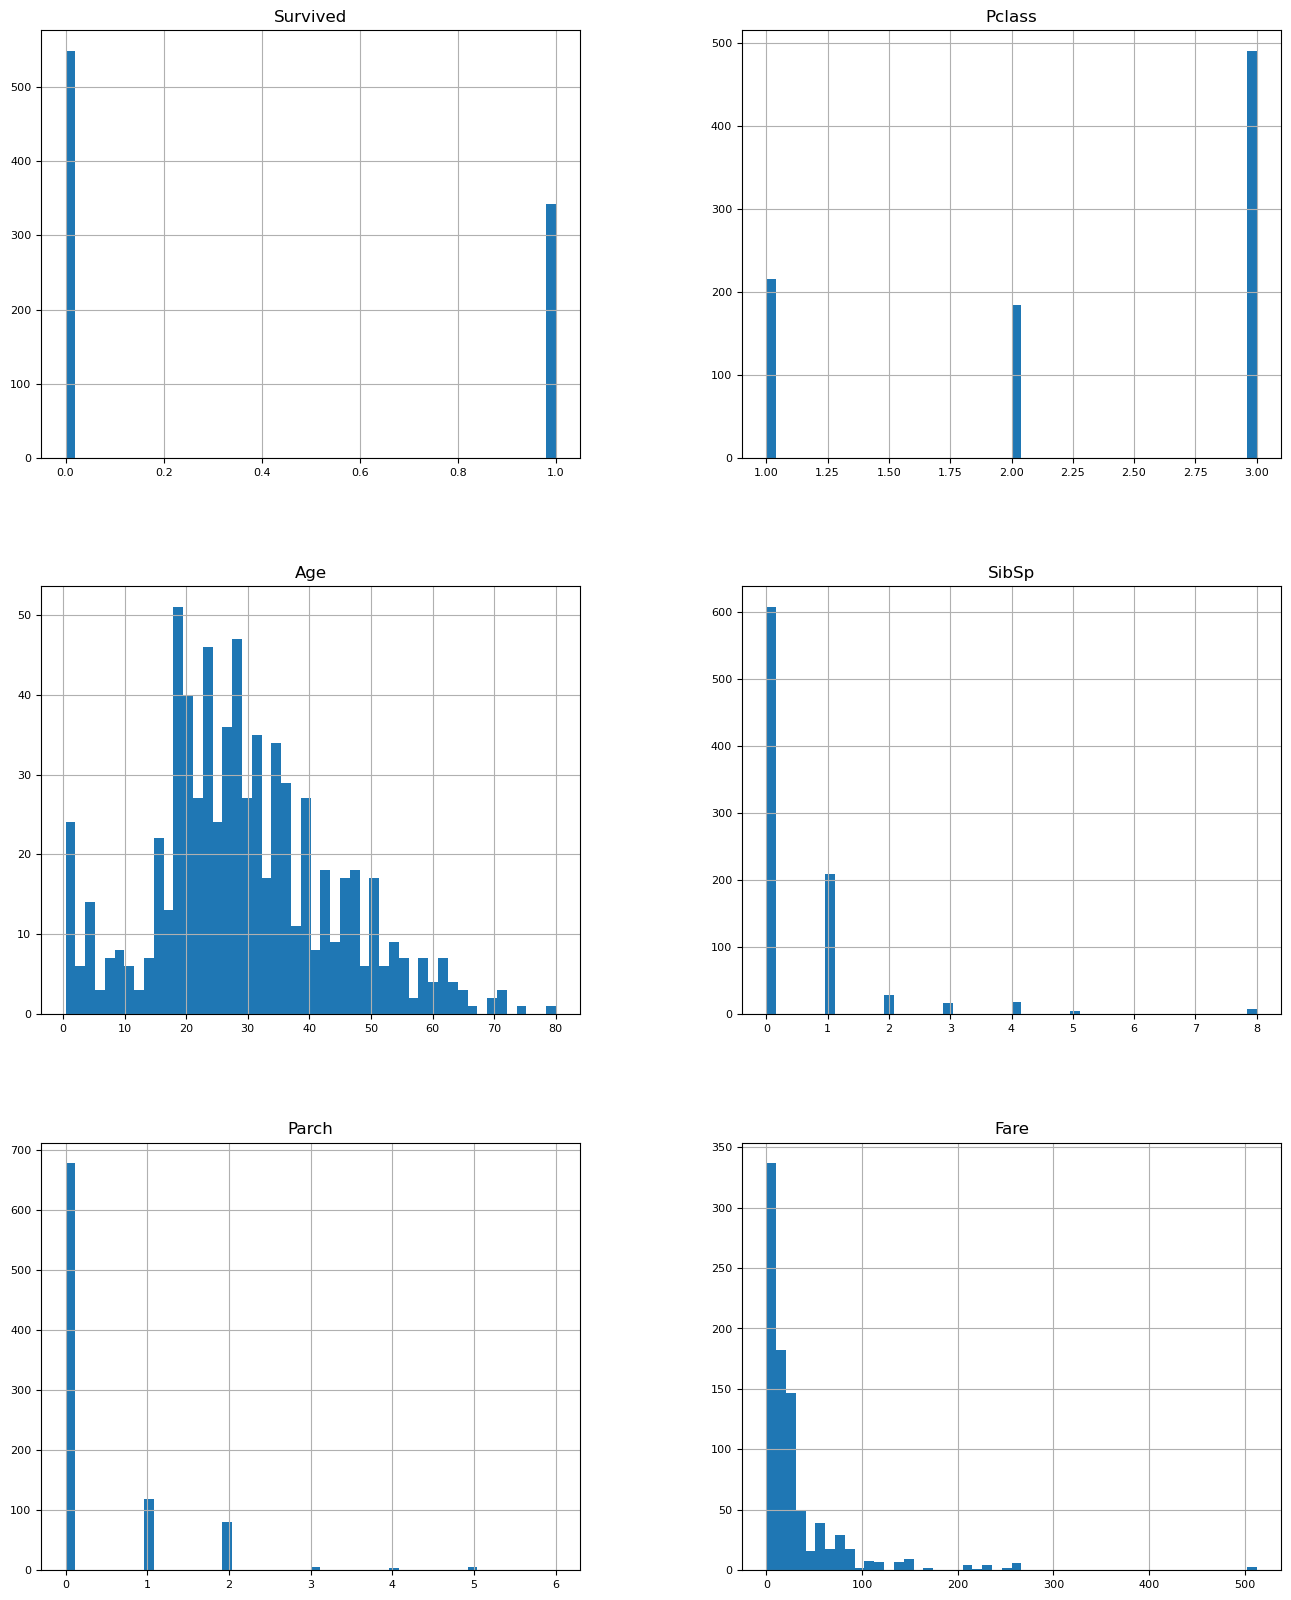

In [25]:
train_data[features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

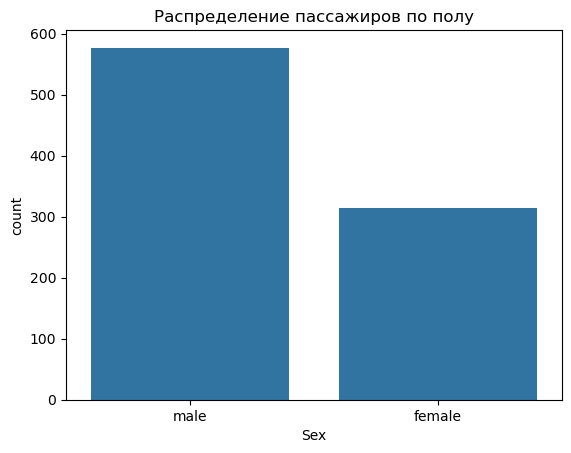

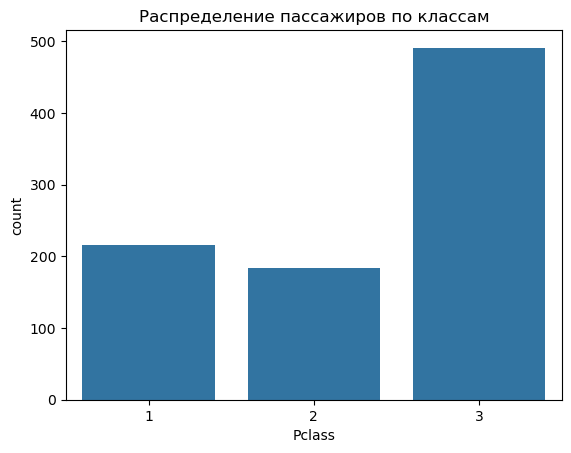

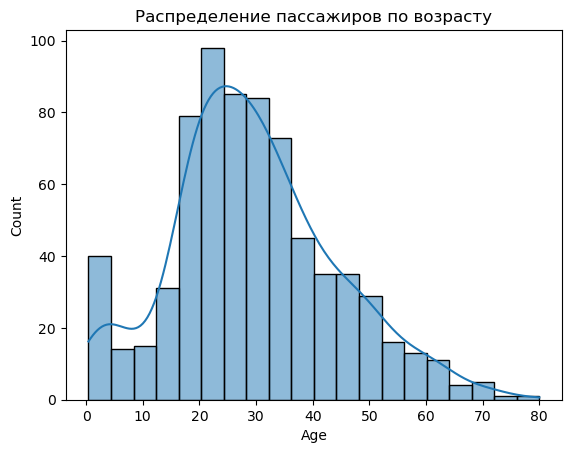

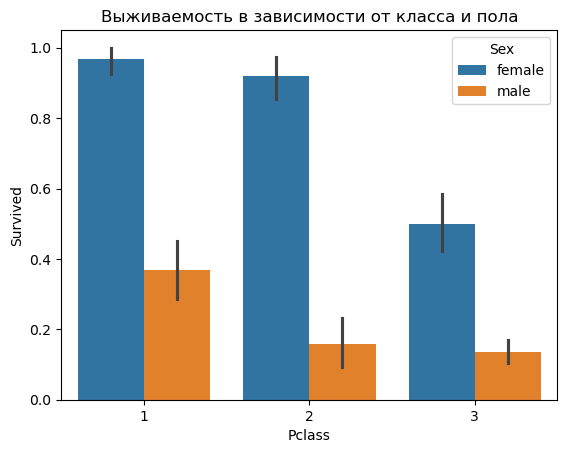

In [26]:
sns.countplot(x='Sex', data=train_data)
plt.title('Распределение пассажиров по полу')
plt.show()

# Распределение пассажиров по классу
sns.countplot(x='Pclass', data=train_data)
plt.title('Распределение пассажиров по классам')
plt.show()

# Распределение по возрасту
sns.histplot(train_data['Age'], kde=True)
plt.title('Распределение пассажиров по возрасту')
plt.show()

# Влияние пола и класса на выживаемость
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data)
plt.title('Выживаемость в зависимости от класса и пола')
plt.show()

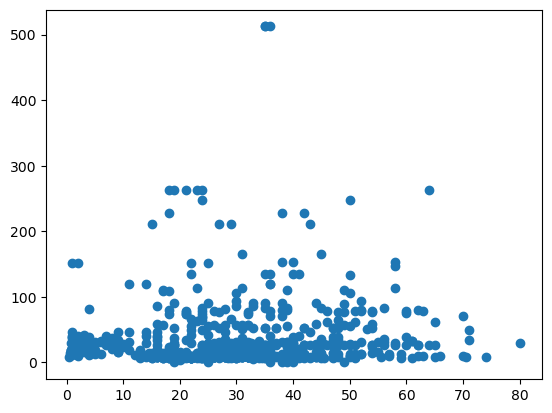

In [27]:
fig = plt.figure()   
plt.scatter(train_data['Age'],train_data['Fare'] )   
plt.show()

видим что основная масса пассижиров покупала билет до 100

In [28]:
#посмотрим кто же купил билет свыше 500. оказывается они выжили
train_data[train_data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [29]:
train_data.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [30]:
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [31]:
test_data.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1, inplace=True)
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [33]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [34]:
# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Модель 1: Логистическая регрессия
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

In [36]:
# Модель 2: Дерево решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_val)

In [37]:
# Оценка моделей
models = {'Logistic Regression': log_reg, 'Decision Tree': tree_clf}

for name, model in models.items():
    if name == 'Logistic Regression':
        y_pred = y_pred_log
    else:
        y_pred = y_pred_tree

    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_val, y_pred):.4f}")
    print()

Logistic Regression:
Accuracy: 0.7989
Precision: 0.7714
Recall: 0.7297
F1-Score: 0.7500

Decision Tree:
Accuracy: 0.7989
Precision: 0.7714
Recall: 0.7297
F1-Score: 0.7500



In [38]:
# 7. Кросс-валидация и подбор гиперпараметров

# Random Forest с GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")

Лучшие параметры: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


Random Forest Accuracy: 0.8156
Random Forest F1-Score: 0.7556


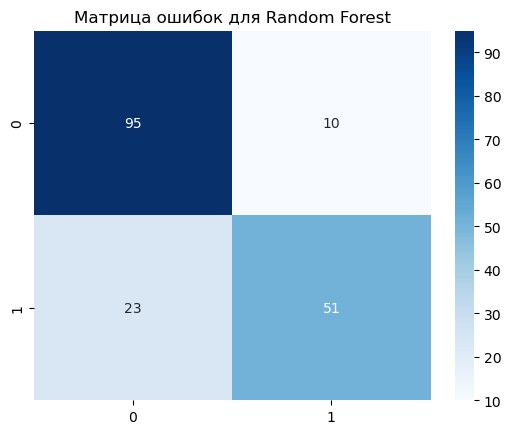

In [39]:
# Оценка на тестовой выборке
y_pred_rf = grid_search.best_estimator_.predict(X_val)
print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")
print(f"Random Forest F1-Score: {f1_score(y_val, y_pred_rf):.4f}")

# 8. Матрица ошибок для Random Forest
conf_matrix = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Матрица ошибок для Random Forest')
plt.show()

# 9. Важность признаков для Random Forest
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

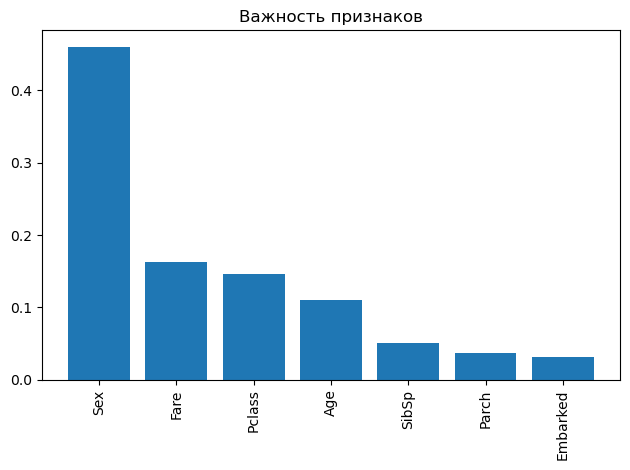

In [40]:
plt.figure()
plt.title('Важность признаков')
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()